In [1]:
!git clone 'https://github.com/Shenggan/BCCD_Dataset.git'

Cloning into 'BCCD_Dataset'...
remote: Enumerating objects: 800, done.
remote: Total 800 (delta 0), reused 0 (delta 0), pack-reused 800
Receiving objects: 100% (800/800), 7.39 MiB | 12.58 MiB/s, done.
Resolving deltas: 100% (378/378), done.


#**DATA PRE-PROCESSING **

# Extraction of data labels from .xml file to dataframe

In [2]:
import shutil
import os, sys, random
import xml.etree.ElementTree as ET
from glob import glob
import pandas as pd
from shutil import copyfile
import pandas as pd
from sklearn import preprocessing, model_selection
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches
import numpy as np
import os

In [3]:
annotations = sorted(glob('/content/BCCD_Dataset/BCCD/Annotations/*.xml'))
# print(len(annotations))
df = []
cnt = 0
for file in annotations:
  prev_filename = file.split('/')[-1].split('.')[0] + '.jpg'
  filename = str(cnt) + '.jpg'
  row = []
  parsedXML = ET.parse(file)
  for node in parsedXML.getroot().iter('object'):
    blood_cells = node.find('name').text
    xmin = int(node.find('bndbox/xmin').text)
    xmax = int(node.find('bndbox/xmax').text)
    ymin = int(node.find('bndbox/ymin').text)
    ymax = int(node.find('bndbox/ymax').text)

    row = [prev_filename, filename, blood_cells, xmin, xmax, ymin, ymax]
    df.append(row)
  cnt += 1

data = pd.DataFrame(df, columns=['prev_filename', 'filename', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax'])

data[['prev_filename','filename', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax']].to_csv('/content/blood_cell_detection.csv', index=False)


# Processing data as per the Yolo V5 format

**DATAFRAME STRUCTURE**

- filename : contains the name of the image
- cell_type: denotes the type of the cell
- xmin: x-coordinate of the bottom left part of the image
- xmax: x-coordinate of the top right part of the image
- ymin: y-coordinate of the bottom left part of the image
- ymax: y-coordinate of the top right part of the image
- labels : Encoded cell-type **(Yolo - label input-1)**
- width : width of that bbox
- height : height of that bbox
- x_center : bbox center (x-axis)
-	y_center : bbox center (y-axis)
-	x_center_norm	: x_center normalized (0-1) **(Yolo - label input-2)**
-	y_center_norm : y_center normalized (0-1) **(Yolo - label input-3)**
- width_norm : width normalized (0-1) **(Yolo - label input-4)**
-	height_norm : height normalized (0-1) **(Yolo - label input-5)**

In [4]:
img_width = 640
img_height = 480

def width(df):
  return int(df.xmax - df.xmin)
def height(df):
  return int(df.ymax - df.ymin)
def x_center(df):
  return int(df.xmin + (df.width/2))
def y_center(df):
  return int(df.ymin + (df.height/2))
def w_norm(df):
  return df/img_width
def h_norm(df):
  return df/img_height

df = pd.read_csv('/content/blood_cell_detection.csv')
print(len(df))
le = preprocessing.LabelEncoder()
le.fit(df['cell_type'])
print(le.classes_)
labels = le.transform(df['cell_type'])
df['labels'] = labels

df['width'] = df.apply(width, axis=1)
df['height'] = df.apply(height, axis=1)

df['x_center'] = df.apply(x_center, axis=1)
df['y_center'] = df.apply(y_center, axis=1)

df['x_center_norm'] = df['x_center'].apply(w_norm)
df['width_norm'] = df['width'].apply(w_norm)

df['y_center_norm'] = df['y_center'].apply(h_norm)
df['height_norm'] = df['height'].apply(h_norm)

df.head(30)

4888
['Platelets' 'RBC' 'WBC']


prev_filename filename cell_type  xmin  xmax  ymin  ymax  labels  \
0   BloodImage_00000.jpg    0.jpg       WBC   260   491   177   376       2   
1   BloodImage_00000.jpg    0.jpg       RBC    78   184   336   435       1   
2   BloodImage_00000.jpg    0.jpg       RBC    63   169   237   336       1   
3   BloodImage_00000.jpg    0.jpg       RBC   214   320   362   461       1   
4   BloodImage_00000.jpg    0.jpg       RBC   414   506   352   445       1   
5   BloodImage_00000.jpg    0.jpg       RBC   555   640   356   455       1   
6   BloodImage_00000.jpg    0.jpg       RBC   469   567   412   480       1   
7   BloodImage_00000.jpg    0.jpg       RBC     1    87   333   437       1   
8   BloodImage_00000.jpg    0.jpg       RBC     4    95   406   480       1   
9   BloodImage_00000.jpg    0.jpg       RBC   155   247    74   174       1   
10  BloodImage_00000.jpg    0.jpg       RBC    11   104    84   162       1   
11  BloodImage_00000.jpg    0.jpg       RBC   534   639    39   139       1   
12  BloodImage_00000.jpg    0.jpg       RBC   547   640   195   295       1   
13  BloodImage_00000.jpg    0.jpg       RBC   388   481    11   111       1   
14  BloodImage_00000.jpg    0.jpg       RBC   171   264   175   275       1   
15  BloodImage_00000.jpg    0.jpg       RBC   260   374     1    83       1   
16  BloodImage_00000.jpg    0.jpg       RBC   229   343    91   174       1   
17  BloodImage_00000.jpg    0.jpg       RBC    69   184   144   235       1   
18  BloodImage_00000.jpg    0.jpg       RBC   482   594   131   230       1   
19  BloodImage_00000.jpg    0.jpg       RBC   368   464    89   176       1   
20  BloodImage_00001.jpg    1.jpg       WBC    68   286   315   480       2   
21  BloodImage_00001.jpg    1.jpg       RBC   346   446   361   454       1   
22  BloodImage_00001.jpg    1.jpg       RBC    53   146   179   299       1   
23  BloodImage_00001.jpg    1.jpg       RBC   449   536   400   480       1   
24  BloodImage_00001.jpg    1.jpg       RBC   461   548   132   212       1   
25  BloodImage_00001.jpg    1.jpg       RBC   454   541   295   375       1   
26  BloodImage_00001.jpg    1.jpg       RBC   417   508   283   383       1   
27  BloodImage_00001.jpg    1.jpg       RBC   278   369   342   451       1   
28  BloodImage_00001.jpg    1.jpg       RBC   545   636    62   159       1   
29  BloodImage_00001.jpg    1.jpg       RBC   485   576    91   188       1   

    width  height  x_center  y_center  x_center_norm  width_norm  \
0     231     199       375       276       0.585938    0.360938   
1     106      99       131       385       0.204687    0.165625   
2     106      99       116       286       0.181250    0.165625   
3     106      99       267       411       0.417187    0.165625   
4      92      93       460       398       0.718750    0.143750   
5      85      99       597       405       0.932813    0.132812   
6      98      68       518       446       0.809375    0.153125   
7      86     104        44       385       0.068750    0.134375   
8      91      74        49       443       0.076563    0.142187   
9      92     100       201       124       0.314063    0.143750   
10     93      78        57       123       0.089063    0.145313   
11    105     100       586        89       0.915625    0.164062   
12     93     100       593       245       0.926562    0.145313   
13     93     100       434        61       0.678125    0.145313   
14     93     100       217       225       0.339062    0.145313   
15    114      82       317        42       0.495312    0.178125   
16    114      83       286       132       0.446875    0.178125   
17    115      91       126       189       0.196875    0.179688   
18    112      99       538       180       0.840625    0.175000   
19     96      87       416       132       0.650000    0.150000   
20    218     165       177       397       0.276562    0.340625   
21    100      93       396       407       0.618750    0.156250 

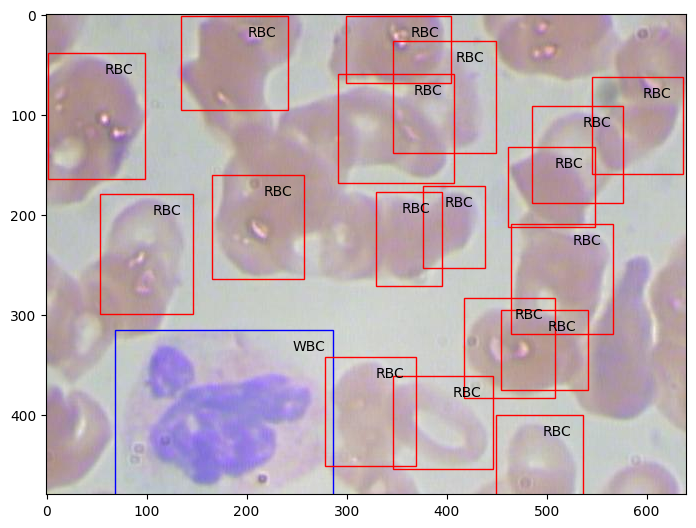

In [ ]:
#@title SAMPLE PLOT - shape (480, 640, 3)
fig = plt.figure()
import cv2
#add axes to the image
ax = fig.add_axes([0,0,1,1])

image = plt.imread('/content/BCCD_Dataset/BCCD/JPEGImages/BloodImage_00001.jpg')
plt.imshow(image)

# iterating over the image for different objects
for _,row in df[df.filename == "1.jpg"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax

    width = xmax - xmin
    height = ymax - ymin

    # different color to different classes of objects
    if row.cell_type == 'RBC':
        edgecolor = 'r'
        ax.annotate('RBC', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'WBC':
        edgecolor = 'b'
        ax.annotate('WBC', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'Platelets':
        edgecolor = 'g'
        ax.annotate('Platelets', xy=(xmax-40,ymin+20))

    # bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')

    ax.add_patch(rect)

# Splitting into training and validation datasets

In [7]:
df_train_temp, df_test = model_selection.train_test_split(df, test_size=0.075, random_state=42, shuffle=True)

df_train, df_valid = model_selection.train_test_split(df_train_temp, test_size=0.10, random_state=42, shuffle=True)

print("Train set shape:", df_train.shape)
print("Validation set shape:", df_valid.shape)
print("Test set shape:", df_test.shape)


Train set shape: (4068, 16)
Validation set shape: (453, 16)
Test set shape: (367, 16)


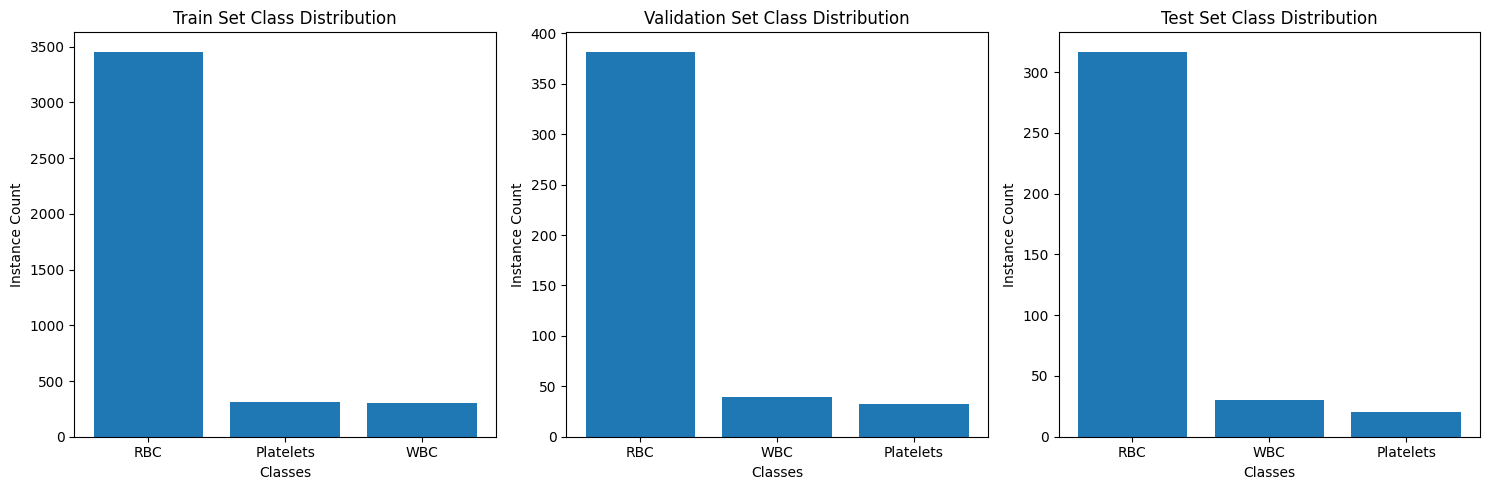

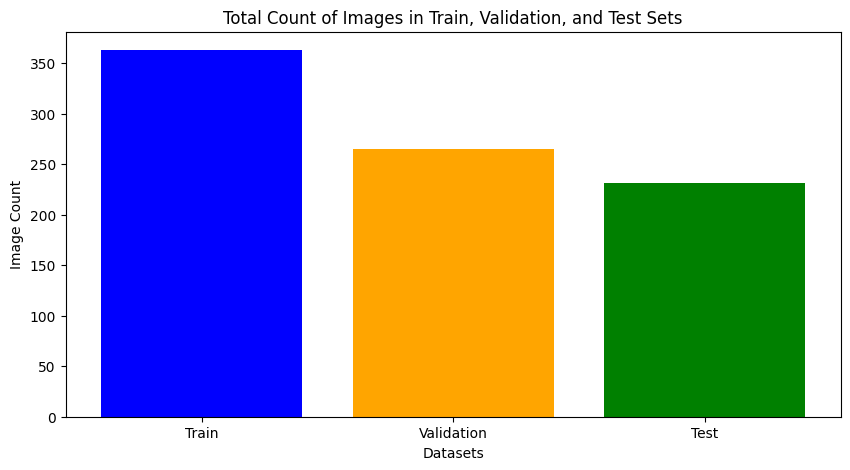

In [8]:
import matplotlib.pyplot as plt

# Count instances of each class in train, validation, and test sets
train_class_counts = df_train['cell_type'].value_counts()
valid_class_counts = df_valid['cell_type'].value_counts()
test_class_counts = df_test['cell_type'].value_counts()

# Total count of images in train, validation, and test sets
train_total_images = len(df_train['filename'].unique())
valid_total_images = len(df_valid['filename'].unique())
test_total_images = len(df_test['filename'].unique())

# Plotting the class distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(train_class_counts.index, train_class_counts.values)
plt.title('Train Set Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Instance Count')

plt.subplot(1, 3, 2)
plt.bar(valid_class_counts.index, valid_class_counts.values)
plt.title('Validation Set Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Instance Count')

plt.subplot(1, 3, 3)
plt.bar(test_class_counts.index, test_class_counts.values)
plt.title('Test Set Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Instance Count')

plt.tight_layout()
plt.show()

# Plotting total count of images in train, validation, and test sets
plt.figure(figsize=(10, 5))

labels = ['Train', 'Validation', 'Test']
values = [train_total_images, valid_total_images, test_total_images]

plt.bar(labels, values, color=['blue', 'orange', 'green'])
plt.title('Total Count of Images in Train, Validation, and Test Sets')
plt.xlabel('Datasets')
plt.ylabel('Image Count')

plt.show()


In [9]:
from sklearn.model_selection import train_test_split

# Splitting the data into train_test_temp and df_valid
df_train_temp, df_valid = train_test_split(df, test_size=0.10, random_state=42, shuffle=True, stratify=df['cell_type'])

# Splitting df_train_temp into df_train and df_test while stratifying
df_train, df_test = train_test_split(df_train_temp, test_size=0.075, random_state=42, shuffle=True, stratify=df_train_temp['cell_type'])


In [10]:
os.mkdir('/content/bcc/')
os.mkdir('/content/bcc/images/')
os.mkdir('/content/bcc/images/train/')
os.mkdir('/content/bcc/images/valid/')
os.mkdir('/content/bcc/images/test/')
os.mkdir('/content/bcc/labels/')
os.mkdir('/content/bcc/labels/train/')
os.mkdir('/content/bcc/labels/valid/')
os.mkdir('/content/bcc/labels/test/')

# Data segregation and moving to it's corresponding folders
- BCC
  - Images
    - Train (364 images [.jpg files])
    - Valid (270 images [.jpg files])
  - Labels
    - Train (364 labels [.txt files])
    - Valid (270 labels [.txt files])


**STRUCTURE OF .txt FILE**

- One row per object
- Each row is class x_center y_center width height format.
- Box coordinates must be in normalized xywh format (from 0 - 1). If your boxes  are in pixels, divide x_center and width by image width, and y_center and height by image height.
- Class numbers are zero-indexed (start from 0).


<img src="https://github.com/bala-codes/Yolo-v5_Object_Detection_Blood_Cell_Count_and_Detection/blob/master/imgs/label_txt.PNG?raw=true" width="50%">


In [12]:
def segregate_data(df, img_path, label_path, train_img_path, train_label_path):
  filenames = []
  for filename in df.filename:
    filenames.append(filename)
  filenames = set(filenames)

  for filename in filenames:
    yolo_list = []

    for _,row in df[df.filename == filename].iterrows():
      yolo_list.append([row.labels, row.x_center_norm, row.y_center_norm, row.width_norm, row.height_norm])

    yolo_list = np.array(yolo_list)
    txt_filename = os.path.join(train_label_path,str(row.prev_filename.split('.')[0])+".txt")
    # Save the .img & .txt files to the corresponding train and validation folders
    np.savetxt(txt_filename, yolo_list, fmt=["%d", "%f", "%f", "%f", "%f"])
    shutil.copyfile(os.path.join(img_path,row.prev_filename), os.path.join(train_img_path,row.prev_filename))

In [13]:
%%time
src_img_path = "/content/BCCD_Dataset/BCCD/JPEGImages/"
src_label_path = "/content/BCCD_Dataset/BCCD/Annotations/"

train_img_path = "/content/bcc/images/train"
train_label_path = "/content/bcc/labels/train"

valid_img_path = "/content/bcc/images/valid"
valid_label_path = "/content/bcc/labels/valid"

test_img_path = "/content/bcc/images/test"
test_label_path = "/content/bcc/labels/test"

segregate_data(df_train, src_img_path, src_label_path, train_img_path, train_label_path)
segregate_data(df_valid, src_img_path, src_label_path, valid_img_path, valid_label_path)
segregate_data(df_test, src_img_path, src_label_path, test_img_path, test_label_path)

CPU times: user 1.39 s, sys: 205 ms, total: 1.59 s
Wall time: 1.59 s


In [14]:
try:
  shutil.rmtree('/content/bcc/images/train/.ipynb_checkpoints')
except FileNotFoundError:
  pass

try:
  shutil.rmtree('/content/bcc/images/valid/.ipynb_checkpoints')
except FileNotFoundError:
  pass

try:
  shutil.rmtree('/content/bcc/labels/train/.ipynb_checkpoints')
except FileNotFoundError:
  pass

try:
  shutil.rmtree('/content/bcc/labels/valid/.ipynb_checkpoints')
except FileNotFoundError:
  pass

print("No. of Training images", len(os.listdir('/content/bcc/images/train')))
print("No. of Training labels", len(os.listdir('/content/bcc/labels/train')))

print("No. of valid images", len(os.listdir('/content/bcc/images/valid')))
print("No. of valid labels", len(os.listdir('/content/bcc/labels/valid')))

print("No. of test images", len(os.listdir('/content/bcc/images/test')))
print("No. of test labels", len(os.listdir('/content/bcc/labels/test')))

No. of Training images 363
No. of Training labels 363
No. of valid images 269
No. of valid labels 269
No. of test images 213
No. of test labels 213


In [ ]:
!zip -r dataset.zip bcc/*

# Finetuning

In [ ]:
# One time installation.
!pip install super-gradients

In [1]:
from super_gradients.training import Trainer
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import (
    coco_detection_yolo_format_train,
    coco_detection_yolo_format_val
)
from super_gradients.training import models
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import (
    DetectionMetrics_050,
    DetectionMetrics_050_095
)
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback
from tqdm.auto import tqdm

import os
import requests
import zipfile
import cv2
import matplotlib.pyplot as plt
import glob
import numpy as np
import random

The console stream is logged into /root/sg_logs/console.log


[2024-05-01 23:17:04] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2024-05-01 23:17:19] INFO - utils.py - NumExpr defaulting to 2 threads.


In [2]:
ROOT_DIR = 'bcc'
train_imgs_dir = 'images/train'
train_labels_dir = 'labels/train'
val_imgs_dir = 'images/valid'
val_labels_dir = 'labels/valid'
test_imgs_dir = 'images/test'
test_labels_dir = 'labels/test'
classes = ['Plateles', 'RBC', 'WBC']

In [3]:
dataset_params = {
    'data_dir':ROOT_DIR,
    'train_images_dir':train_imgs_dir,
    'train_labels_dir':train_labels_dir,
    'val_images_dir':val_imgs_dir,
    'val_labels_dir':val_labels_dir,
    'test_images_dir':test_imgs_dir,
    'test_labels_dir':test_labels_dir,
    'classes':classes
}

In [4]:
# Global parameters.
EPOCHS = 1  ##for quick inference
BATCH_SIZE = 16
WORKERS = 8

In [5]:
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [6]:
# Function to convert bounding boxes in YOLO format to xmin, ymin, xmax, ymax.
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

In [7]:
def plot_box(image, bboxes, labels):
    # Need the image height and width to denormalize
    # the bounding box coordinates
    height, width, _ = image.shape
    lw = max(round(sum(image.shape) / 2 * 0.003), 2)  # Line width.
    tf = max(lw - 1, 1) # Font thickness.
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        # denormalize the coordinates
        xmin = int(x1*width)
        ymin = int(y1*height)
        xmax = int(x2*width)
        ymax = int(y2*height)

        p1, p2 = (int(xmin), int(ymin)), (int(xmax), int(ymax))

        class_name = classes[int(labels[box_num])]

        color=colors[classes.index(class_name)]

        cv2.rectangle(
            image,
            p1, p2,
            color=color,
            thickness=lw,
            lineType=cv2.LINE_AA
        )

        # For filled rectangle.
        w, h = cv2.getTextSize(
            class_name,
            0,
            fontScale=lw / 3,
            thickness=tf
        )[0]

        outside = p1[1] - h >= 3
        p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3

        cv2.rectangle(
            image,
            p1, p2,
            color=color,
            thickness=-1,
            lineType=cv2.LINE_AA
        )
        cv2.putText(
            image,
            class_name,
            (p1[0], p1[1] - 5 if outside else p1[1] + h + 2),
            cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=lw/3.5,
            color=(255, 255, 255),
            thickness=tf,
            lineType=cv2.LINE_AA
        )
    return image

In [8]:
# Function to plot images with the bounding boxes.
def plot(image_path, label_path, num_samples):
    all_training_images = glob.glob(image_path+'/*')
    all_training_labels = glob.glob(label_path+'/*')
    all_training_images.sort()
    all_training_labels.sort()

    temp = list(zip(all_training_images, all_training_labels))
    random.shuffle(temp)
    all_training_images, all_training_labels = zip(*temp)
    all_training_images, all_training_labels = list(all_training_images), list(all_training_labels)

    num_images = len(all_training_images)

    if num_samples == -1:
        num_samples = num_images

    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        image_name = all_training_images[i].split(os.path.sep)[-1]
        image = cv2.imread(all_training_images[i])
        with open(all_training_labels[i], 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label, x_c, y_c, w, h = label_line.split(' ')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        plt.subplot(2, 2, i+1) # Visualize 2x2 grid of images.
        plt.imshow(image[:, :, ::-1])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

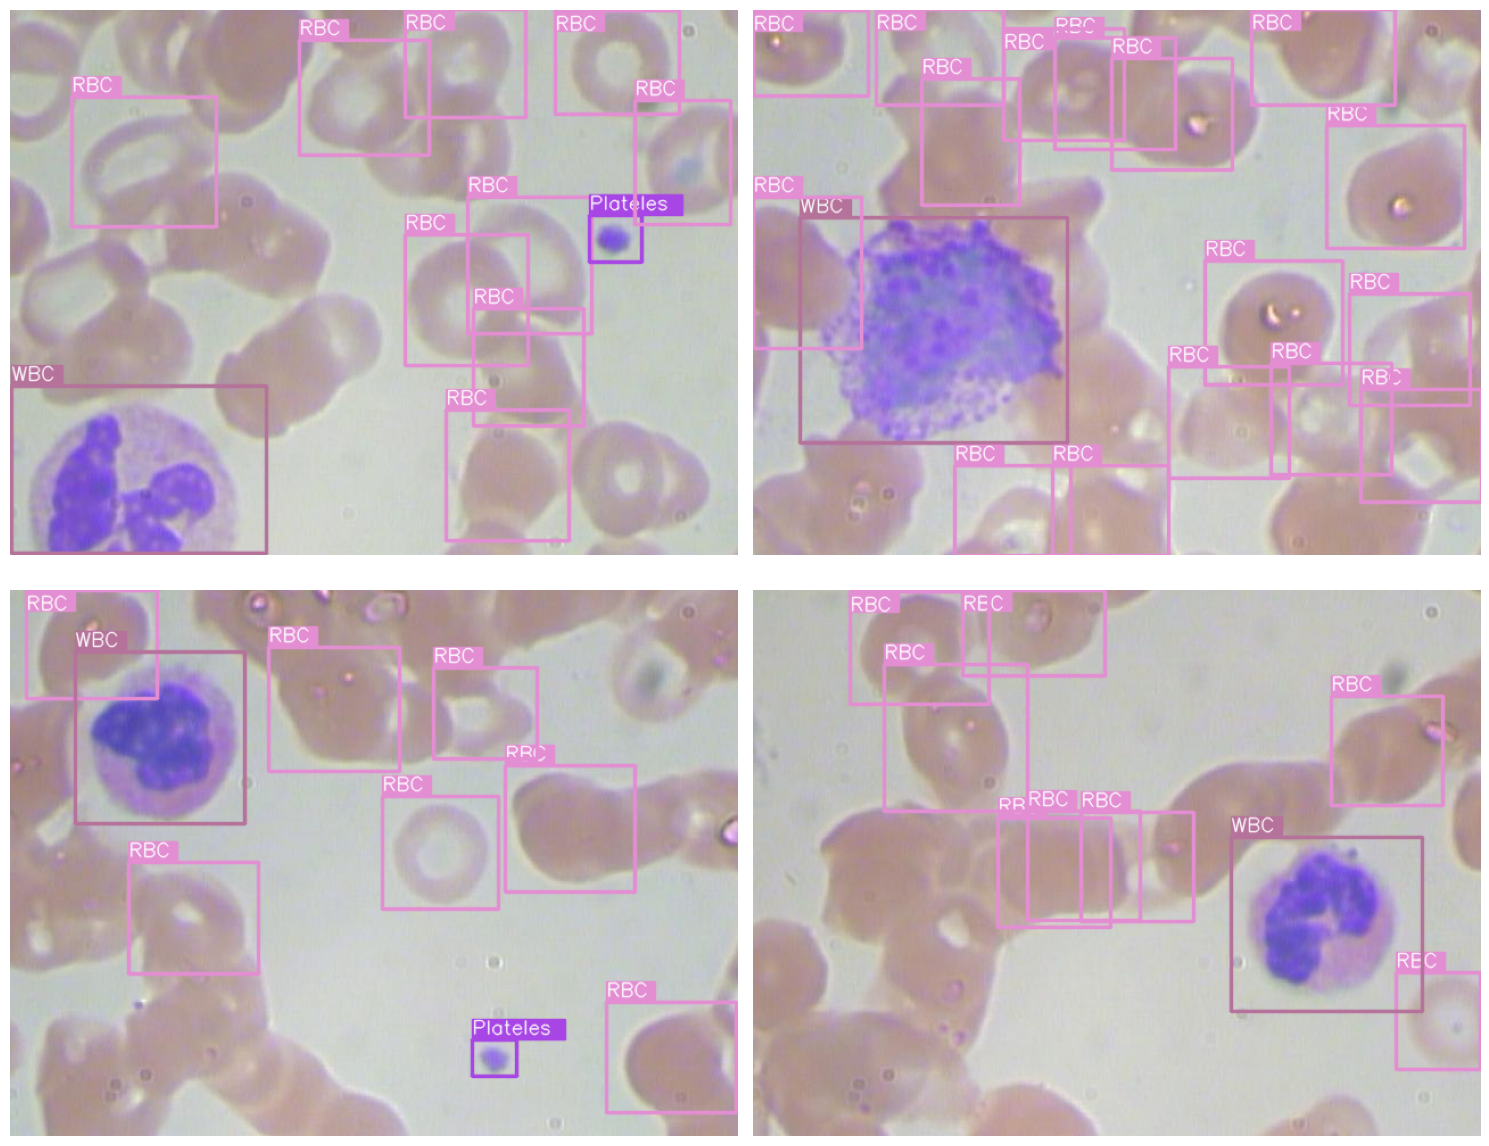

In [9]:
# Visualize a few training images.
plot(
    image_path=os.path.join(ROOT_DIR, train_imgs_dir),
    label_path=os.path.join(ROOT_DIR, train_labels_dir),
    num_samples=4,
)

In [10]:
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':BATCH_SIZE,
        'num_workers':WORKERS
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':BATCH_SIZE,
        'num_workers':WORKERS
    }
)

[2024-05-01 23:17:39] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 363/363 [00:00<00:00, 821.10it/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
[2024-05-01 23:17:39] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 269/269 [00:00<00:00, 979.03it/s]


In [11]:
train_data.dataset.transforms

In [12]:
train_data.dataset.transforms[0]

In [13]:
# An example on how to modify augmentations #
train_data.dataset.transforms.pop(2)

In [14]:
train_data.dataset.transforms

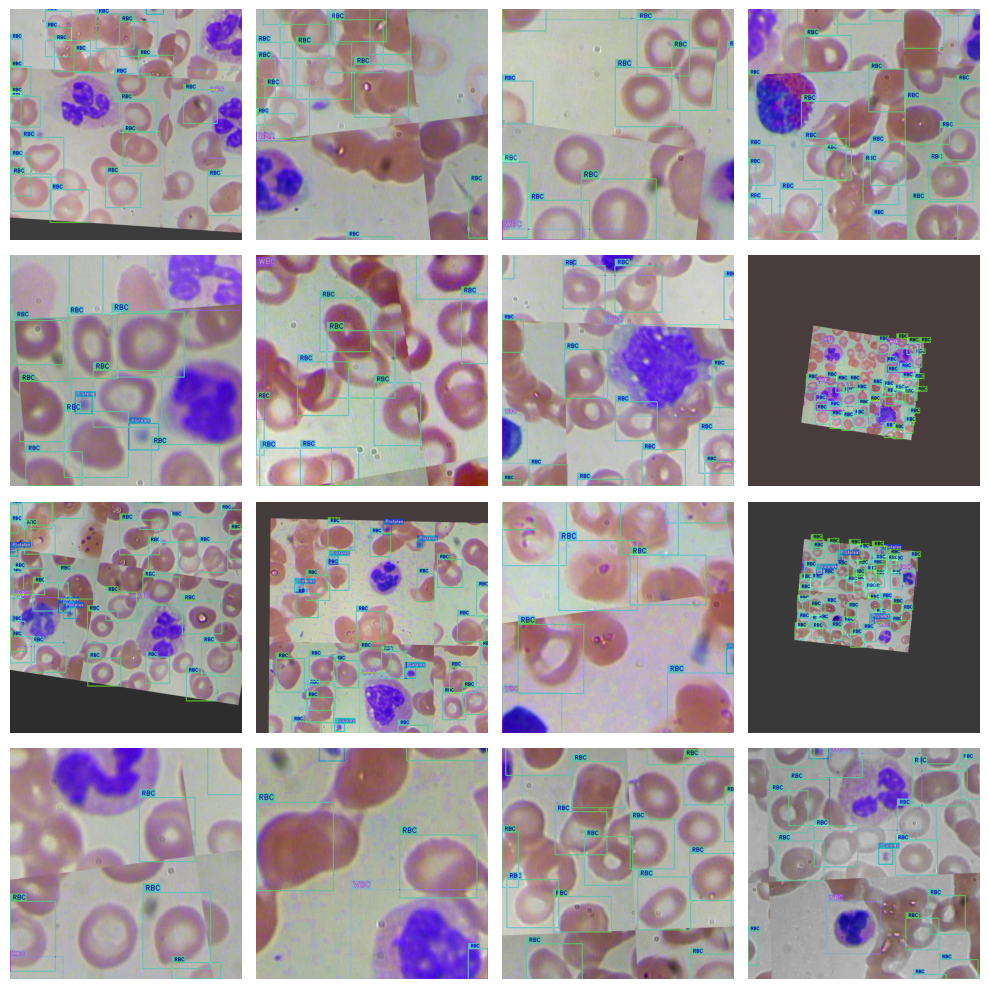

In [15]:
# We visualize the images with augmentation here.
train_data.dataset.plot(plot_transformed_data=True)

In [16]:
train_params = {
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-7,#-->divided by 10
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-5,#--> divided by 10
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    "max_epochs": EPOCHS,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        ),
        DetectionMetrics_050_095(
            score_thres=0.1,
            top_k_predictions=300,
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50:0.95'
}

In [17]:
models_to_train = [
    # 'yolo_nas_s',
    'yolo_nas_m',
    # 'yolo_nas_l'
]

In [18]:
CHECKPOINT_DIR = 'checkpoints'

In [ ]:
for model_to_train in models_to_train:
    trainer = Trainer(
        experiment_name=model_to_train,
        ckpt_root_dir=CHECKPOINT_DIR
    )

    model = models.get(
        model_to_train,
        num_classes=len(dataset_params['classes']),
        pretrained_weights="coco"
    )

    trainer.train(
        model=model,
        training_params=train_params,
        train_loader=train_data,
        valid_loader=val_data
    )

[2024-03-19 13:52:49] WARNING - checkpoint_utils.py - :warning: The pre-trained models provided by SuperGradients may have their own licenses or terms and conditions derived from the dataset used for pre-training.
 It is your responsibility to determine whether you have permission to use the models for your use case.
 The model you have requested was pre-trained on the coco dataset, published under the following terms: https://cocodataset.org/#termsofuse
[2024-03-19 13:52:49] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_m_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_m_coco.pth
100%|██████████| 196M/196M [00:07<00:00, 29.0MB/s]
[2024-03-19 13:52:57] INFO - checkpoin

The console stream is now moved to checkpoints/yolo_nas_m/RUN_20240319_135257_615130/console_Mar19_13_52_57.txt


/usr/local/lib/python3.10/dist-packages/super_gradients/common/registry/registry.py:72: DeprecationWarning: Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.
  warnings.warn(f"Object name `{name}` is now deprecated. Please replace it with `{deprecated_names[name]}`.", DeprecationWarning)
/usr/local/lib/python3.10/dist-packages/super_gradients/training/utils/optimizer_utils.py:108: DeprecationWarning: initialize_param_groups and update_param_groups usages are deprecated since 3.4.0, will be removed in 3.5.0 and have no effect. 
 Assign different learning rates by passing a mapping of layer name prefixes to lr values through initial_lr training hyperparameter (i.e initial_lr={'backbone': 0.01, 'default':0.1})
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is small

SUMMARY OF EPOCH 0
├── Train
│   ├── Ppyoloeloss/loss_cls = 2.3327
│   ├── Ppyoloeloss/loss_iou = 0.7639
│   ├── Ppyoloeloss/loss_dfl = 0.7932
│   └── Ppyoloeloss/loss = 3.8899
└── Validation
    ├── Ppyoloeloss/loss_cls = 2.3503
    ├── Ppyoloeloss/loss_iou = 0.83
    ├── Ppyoloeloss/loss_dfl = 0.9022
    ├── Ppyoloeloss/loss = 4.0826
    ├── Precision@0.50 = 0.0
    ├── Recall@0.50 = 0.0
    ├── Map@0.50 = 0.001
    ├── F1@0.50 = 0.0
    ├── Best_score_threshold = 0.02
    ├── Precision@0.50:0.95 = 0.0
    ├── Recall@0.50:0.95 = 0.0
    ├── Map@0.50:0.95 = 0.0003
    └── F1@0.50:0.95 = 0.0



[2024-03-19 13:54:10] INFO - sg_trainer.py - RUNNING ADDITIONAL TEST ON THE AVERAGED MODEL...
Validating epoch 1: 100%|██████████| 17/17 [00:14<00:00,  1.96it/s]

# Inference

In [19]:
os.makedirs('inference_results/images/', exist_ok=True)

In [20]:
ROOT_TEST = 'bcc/images/test/'
all_images = os.listdir(ROOT_TEST)

In [21]:
import torch
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

In [22]:
device

device(type='cuda', index=0)

In [23]:
import gdown
url = 'https://drive.google.com/file/d/1rE-1rTb8yaEI5IpQpv8jfRKmtOpNMWoD/view?usp=drive_link'

gdown.download(url=url, output='ckpt_best.pth', fuzzy=True)


Downloading...
From (original): https://drive.google.com/uc?id=1rE-1rTb8yaEI5IpQpv8jfRKmtOpNMWoD
From (redirected): https://drive.google.com/uc?id=1rE-1rTb8yaEI5IpQpv8jfRKmtOpNMWoD&confirm=t&uuid=917c0d7a-6859-4b15-b2a4-9e7cd88146c3
To: /content/ckpt_best.pth
 97%|█████████▋| 663M/681M [00:21<00:00, 58.5MB/s]

'ckpt_best.pth'

In [24]:
model = models.get(
    model_name='yolo_nas_m',
    checkpoint_path='/content/ckpt_best.pth',
    num_classes=3
).to(device)

[2024-05-01 23:21:33] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/ckpt_best.pth EMA checkpoint.


In [25]:
for ind,image in tqdm(enumerate(all_images), total=len(all_images)):
    image_path = os.path.join(ROOT_TEST, image)
    out = model.predict(image_path)
    out.save('inference_results/images/pred_'+str(ind)+'.jpg')

[2024-05-01 23:23:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-05-01 23:23:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-05-01 23:23:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-05-01 23:23:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-05-01 23:23:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-05-01 23:23:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-05-01 23:23:16] INFO -